# Week 8

## Monday 10-05

*Texbtook Coverage*: Ch 5

"Random Walks".  We'll us a simpflified model for Brownian Motion:

At any time, the particle has 4 options:

- go right
- go up
- go left
- go down

Suppose each time, it moves a fixed disntance (let's say 10 pixels).

(Our particle will be a turtle).

Let's use the `random()` function to simulate where our particle (a turle) will go.

Recall, random gives real values betwen 0<=x<.9999999999999

- If our random number is between 0 and .25, then the turtle goes right.
- If random number is between .25 and .5, go up.
- If between .5 and .75, go left
- If between .75 and 1, go down.

What we care about:

 - ending position of our turtle after a certain number of steps
 - distance travlled
 
 
Let's write our function:


In [19]:
import random
import turtle

def randomWalk(t, steps):
    """
    input:  t is our turtle object
            steps = the number of iterations/steps the turtle takes
    """
    
    # need an initial position.  Assume (0,0).
    # initialize variables:
    
    x = 0
    y = 0
    
    
    # need the turtle to take `steps` steps:
    
    for step in range(steps):
        # choose a random number.  remember, btween 0 and 1
        rand = random.random()
        
        #decide what to do:
        
        if rand<.25:
            x = x+10
        elif rand<.5:
            y = y+10
        elif rand < .75:
            x = x-10
        else:
            y = y-10
        t.goto(x,y)
        
jeff = turtle.Turtle()        
        
randomWalk(jeff, 500)        
    

First question: for a certain number of steps, how -far- does the particle go?


Different each time, since random.  But, are there any patterns?

Recall from high school math, distance:

D = sqrt( (x2-x1)^2 + (y2 - y1)^2 )   (pythag theorem)

Easier for us, since starting at (0,0):

D = sqrt( x^2 + y^2 )

where (x,y) is our final position.

Let's adjust our function.  Additional argument:  do we want to draw?

Let's give the user an option using a "boolean" value, i.e. either true or false.  

Let's call this arguemnt `draw`.  If the user chooses `true`, then it'll draw the turle.  Otherwise, just return the distance.



In [3]:
import random
import turtle
import math

def randomWalk(t, steps, draw):
    """
    input:  t is our turtle object
            steps = the number of iterations/steps the turtle takes
            draw is a boolean value.  If true, draws turtle
    """
    
    # need an initial position.  Assume (0,0).
    # initialize variables:
    
    x = 0
    y = 0
    
    
    # need the turtle to take `steps` steps:
    
    for step in range(steps):
        # choose a random number.  remember, btween 0 and 1
        rand = random.random()
        
        #decide what to do:
        
        if rand<.25:
            x = x+10
        elif rand<.5:
            y = y+10
        elif rand < .75:
            x = x-10
        else:
            y = y-10
        if draw:     #remember, draw is either true or false
            t.goto(x,y)
            
    # need to return the distance
    
    return  math.sqrt(x**2+y**2)  
 
    


In [4]:
randomWalk(None, 1000, False)

158.11388300841898

Question:  in general, how far does the turle go for a cetain number of steps?  Is it predictable?  Are there patterns?

Goal:  write a function that repeats the randomWalk a certain number of times (say 1000) and makes a histogram of the results.



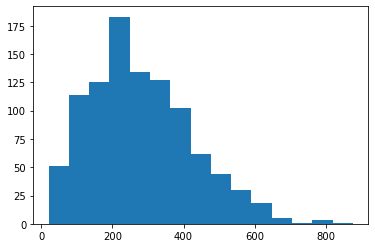

In [10]:
import matplotlib.pyplot as pyplot

def distances(steps, trials):
    """
    Input:  steps = the number of steps in the brownian motion process
            trials = the number of time we wish to repeat the experiment
            
    """  
    # accumulator for distances
    
    dists = []
    
    for trial in range(trials):
        dists.append(randomWalk(None, steps, False))
        
    pyplot.hist(dists, bins=15)
    
## make a hist of the distances for 1000 steps, 1000 trials

distances(1000,1000)

#make a hist of the ditances for 1000 steps, 1000 trials:



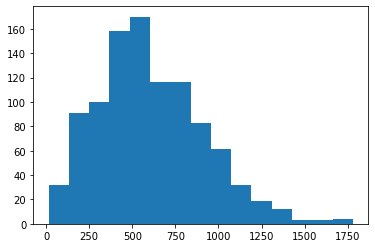

In [11]:
#5000 steps, 1000 trials

distances(5000, 1000)

Next time:  how does the distance travelled increase as the the number of steps increases?

## Wednesday 10-07

*Textbook: Ch 5*

We saw above that, in general, more steps in a random walk leads to a greater distance travelled.

What exactly is the relationship between number of steps and average distance?

Write two functions:

  - avgDist(steps, trials):  return the average distance travelled by our particle after taking `steps` steps over `trials` number of trials
  
  
  - plotAverages(maxSteps, trials):  we'll test for various numbers of steps, what's the average distance travlled and plot the result
  
  
  
  

In [19]:
import matplotlib.pyplot as pyplot

def avgDist(steps, trials):
    """input:  steps is the number of steps in the walk, trials is the number of repetitions"""
    
    # need to keep track of our distances
    # use accumulator
    
    dists = []
    
    #write a loop to find all the distances
    
    for i in range(trials):
        distance = randomWalk(None, steps, False)
        dists.append(distance)
        
    return sum(dists)/trials
    
    
def plotAverages(maxSteps, trials):
    """ maxSteps is the greatest number of steps.  Let's look at multiples of 100:
    
    100 steps, 200 steps, 300 steps, 400 steps, ...... maxSteps
    
    trials:  number of walks that are averaged out
    """
        
    # need an accumulator for average distances:
    
    avgDists = []
    
    # loop through:
    
    stepRange = range(100, maxSteps+1, 100)     #start at 100, end at maxSteps+1, increment by 100
    
    for step in stepRange:
        
        myAverage = avgDist(step, trials)
        avgDists.append(myAverage)
    
    # plot:  x vals = steps, y vals = distances
    
    xvals = list(stepRange)
    yvals = avgDists
    
    pyplot.plot(xvals,yvals, label="Avg Dist")
    pyplot.xlabel("Number of Steps")
    pyplot.ylabel("Avg Distance Travelled")
    pyplot.title("Relationship Btwn Steps and Distanace")
    pyplot.legend()
    

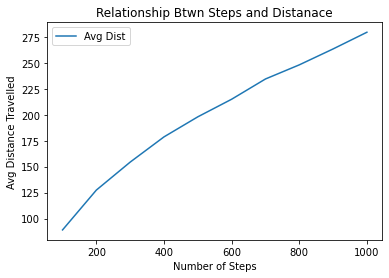

In [20]:
plotAverages(1000,5000)

Cool!  Looks like distance travelled tracks closely to the sqrt(steps)!!  Interesting relationship.



## Central Limit Theorem

One more cool Monte Carlo application:  we can demonstrate the fundamental result of statistics with random processes.

In statistics, the Central Limit Theorem states that, as long as our sample size large, then sample means follow a normal (bell curve) distribution!

Super crazy!  Bell curves show up naturally any time we're talking about averages of numbers!!!

Let's demonstrate this.

Idea:

1)  Generate many sets of random numbers.  Ex:  1000 collections 1000 random numbers.
2)  plot a histogram of their averages.
3)  Say "ooooooohhh!!"



Let's write some functions:


In [30]:
import random

def randVals(n):
    """
    returns a list of n random values between 0 and 1
    """
    xvals = []     # accumulator for random values
    
    for i in range(n):
        xvals.append(random.random())
        
    return xvals

## make function to plot averages

def histAvgs(n, trials):
    """ We'll find `trials` number of sets of `n` random numbers.  THen, plot a hist
    of the the mean for each one
    """
    
    # make an accumulator to store the means
    
    means = []
    
    
    for trial in range(trials):
        xvals = randVals(n)
        mean = sum(xvals)/n
        means.append( mean )     #appends the mean of xvals to means
        
        
    pyplot.hist(means, bins=30)
    pyplot.title("Means for n random numbers btwn 0 and 1")
    pyplot.xlabel("mean")
    pyplot.ylabel("frequency")
    
    
    
    


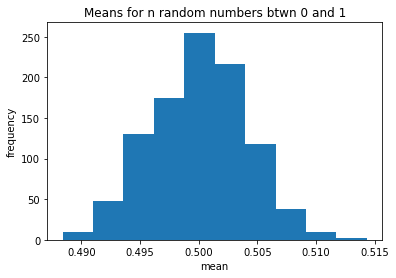

In [27]:
histAvgs(5000, 1000)

Woah!  We've just observed the central limit theorem!  When analyzing the means of random numbers, we see that those means follow the bell curve/normal dist.

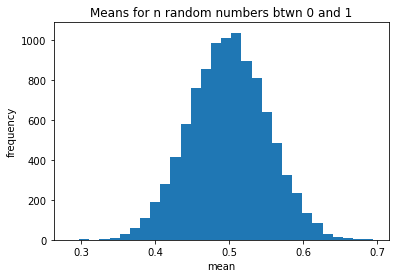

In [35]:
histAvgs(30, 10000)

## Booleans

"Booleans" are data types in computer languages that represent "true" or "false".  In machine code, that's "1" or "0".


Use them to check for conditions.

Ex:  write a simple function to check if x is less than y:


In [36]:
def compare(x,y):
    if x<y:
        return True
    else:
        return False



In [37]:
compare(4,5)

True

In python, you can directly return a boolean.  Let's re-write the above function

In [38]:
def compare(x,y):
    return x<y

In [39]:
compare(4,5)

True

In [40]:
compare(6, 3)

False